### Task 1

### import the dependencies

In [73]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from skimage import io, color
import mpl_toolkits.mplot3d 
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error

### Load the dataset and seperate the x features from the y

In [41]:
dataset = pd.read_csv('/Users/macbookpro/Desktop/neural_nets/lab_5/data/Wine.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

The data is a wine data that shows us different class of wine lovers. From the Customer Segment, we can see that we have 3 classes of customers that we can classify. We will try compress the features of these dataset and see if we can get better classification when we run our prediction.

In [42]:
dataset.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [43]:
dataset.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,1.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,1.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,1.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,2.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,3.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,3.000000


In [44]:
dataset.isna().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
Customer_Segment        0
dtype: int64

In [45]:
dataset.Customer_Segment.value_counts()

Customer_Segment
2    71
1    59
3    48
Name: count, dtype: int64

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [47]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### PCA

In [48]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
train_features_pca = pca.fit_transform(X_train)
test_feature_pca = pca.transform(X_test)

In [49]:
print("Исходное количество признаков:", X_train.shape[1])
print("Сокращенное количество признаков:", train_features_pca.shape[1])

Исходное количество признаков: 13
Сокращенное количество признаков: 2


###  Train the model with original features without reducing the dimensions

In [50]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

### Confusion Matrix

In [51]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[14  0  0]
 [ 0 16  0]
 [ 0  0  6]]


1.0

### Create a model with the transformed features with pca

In [52]:
classifier_pca = LogisticRegression(random_state = 0)
classifier_pca.fit(train_features_pca, y_train)

LogisticRegression(random_state=0)

In [53]:
y_pred_pca = classifier_pca.predict(test_feature_pca)
cm_pca =  confusion_matrix(y_test, y_pred_pca)
print(cm_pca)
accuracy_score(y_test, y_pred_pca)

[[14  0  0]
 [ 1 15  0]
 [ 0  0  6]]


0.9722222222222222

### Task 2

### Kernel  PCA

In [54]:
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(n_components = 2, kernel='rbf')
train_features_kpca = kpca.fit_transform(X_train)
test_feature_kpca = kpca.transform(X_test)

In [55]:
print("Исходное количество признаков:", X_train.shape[1])
print("Сокращенное количество признаков:", train_features_kpca.shape[1])

Исходное количество признаков: 13
Сокращенное количество признаков: 2


In [56]:
classifier_kpca = LogisticRegression(random_state = 0)
classifier_kpca.fit(train_features_kpca, y_train)

LogisticRegression(random_state=0)

In [57]:
y_pred_kpca = classifier_kpca.predict(test_feature_kpca)
cm_pca =  confusion_matrix(y_test, y_pred_kpca)
print(cm_pca)
accuracy_score(y_test, y_pred_kpca)

[[14  0  0]
 [ 0 16  0]
 [ 0  0  6]]


1.0

### Task 3

([], [])

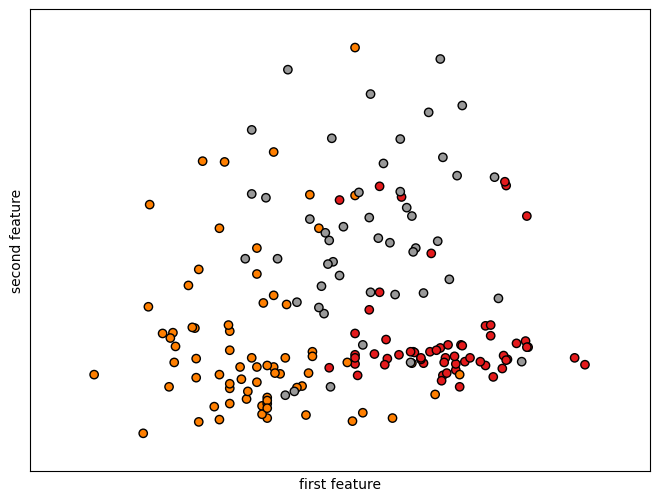

In [59]:
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
plt.figure(2, figsize=(8, 6))
plt.clf()
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1, 
edgecolor="k")
plt.xlabel("first feature")
plt.ylabel("second feature")
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

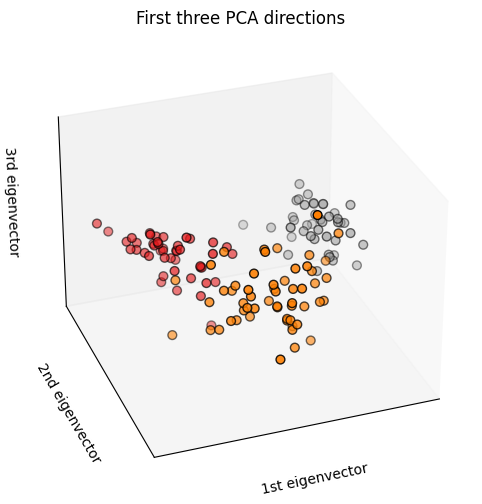

In [60]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
from mpl_toolkits.mplot3d import Axes3D  # For 3D plotting in matplotlib

# Create a 3D plot
fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d", elev=-150, azim=110)

# Apply PCA to reduce data to 3 dimensions
X_reduced = PCA(n_components=3).fit_transform(X_train)

# Plot the points
sc = ax.scatter(
    X_reduced[:, 0],
    X_reduced[:, 1],
    X_reduced[:, 2],
    c=y_train,
    cmap=plt.cm.Set1,
    edgecolor="k",
    s=40,
)

# Set plot title and labels
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.set_ylabel("2nd eigenvector")
ax.set_zlabel("3rd eigenvector")

# Hide tick labels without causing errors
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])

plt.show()


###  Task 4. Image compression using PCA

In [61]:
# Load and preprocess the image
image = io.imread('/Users/macbookpro/Desktop/neural_nets/profilepic.jpeg') 
image_gray = color.rgb2gray(image)  # Convert to grayscale if it's a color image


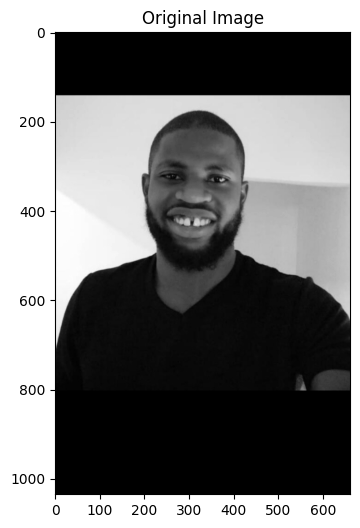

In [62]:
# Display the original grayscale image
plt.figure(figsize=(6, 6))
plt.title("Original Image")
plt.imshow(image_gray, cmap='gray')
plt.show()


In [63]:
# Flatten the image data (each row is a pixel, each column a feature)
height, width = image_gray.shape
image_flattened = image_gray.reshape(height, -1)

In [64]:
image_flattened.shape

(1035, 662)

In [65]:
# Apply PCA
n_components = 50  
pca = PCA(n_components=n_components)
compressed = pca.fit_transform(image_flattened)

In [66]:
compressed.shape

(1035, 50)

In [68]:
# Reconstruct the image from the compressed data
reconstructed = pca.inverse_transform(compressed)
image_compressed = reconstructed.reshape(height, width)


In [69]:
image_compressed.shape

(1035, 662)

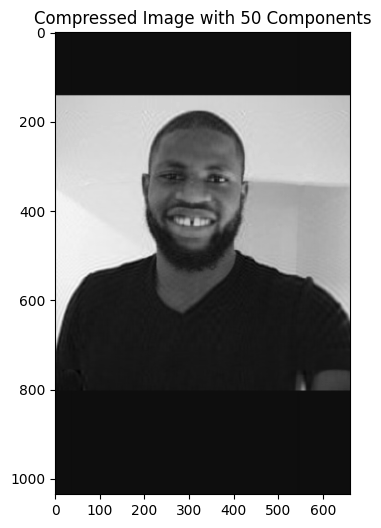

In [70]:
# Display the compressed image
plt.figure(figsize=(6, 6))
plt.title(f"Compressed Image with {n_components} Components")
plt.imshow(image_compressed, cmap='gray')
plt.show()

In [74]:
# 1. Calculate Mean Squared Error (MSE)
mse = mean_squared_error(image_gray, image_compressed)
print(f"Mean Squared Error (MSE): {mse}")


Mean Squared Error (MSE): 0.0001267343827748393


In [75]:
max_pixel = 1.0  # Assuming the image is normalized between 0 and 1
psnr = 20 * np.log10(max_pixel) - 10 * np.log10(mse)
print(f"Peak Signal-to-Noise Ratio (PSNR): {psnr} dB")

Peak Signal-to-Noise Ratio (PSNR): 38.97105545940095 dB


### A PSNR value above 30 dB is typically considered good for image compression quality